# Supervised Machine Learning
**Author:** Sonwabile Diko (217050276)<br>
**Date:** 13 September 2023<br>
**Source:** [User Data (kaggle.com)](https://www.kaggle.com/datasets/sandragracenelson/user-data)<br>
**GitHub:** [Jupyter-Notebook GitHub](https://github.com/SKDiko/Jupyter-Notebook/blob/c343e7401dd7cf3505cd835c327375564c970106/mata_dataset.ipynb)<br>

## Introduction
A car manufacturer has recently released a new SUV vehicle. The user dataset consists of information about users who are potential customers for the SUV car. It contains four input features - user ID, gender, age, and estimated annual salary - that are used to predict whether or not the user wants to purchase the car, as indicated by the purchased column. The company wants to give the advertisements to users who are interested in buying the SUV car. So, the company wanted to check how many users from the dataset wanted to purchase the car. For this problem, we will build a machine learning model using logistic regression, k-nearest neighbor, support vector machine, naïve bayes, decision tree, and a random forest classifier. The estimated salary and age will be considered as independent variables and the purchased variable as a dependent variable.

## Purpose
The purpose of this supervised learning classification assignment is to use multiple supervised learning techniques to identify the best supervised learning model for classifying the users who want to purchase the SUV car from those who do not want to purchase the SUV car.

## 1.  Import, Read, and View Dataset

### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1.2 Read CSV

In [2]:
df = pd.read_csv('C:\\Users\\Administrator\\Documents\\pandas_projects\\machine_learning\\user_data.csv')

### 1.3 View Dataframe

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,Not Buy
1,15810944,Male,35,20000,Not Buy
2,15668575,Female,26,43000,Not Buy
3,15603246,Female,27,57000,Not Buy
4,15804002,Male,19,76000,Not Buy
...,...,...,...,...,...
395,15691863,Female,46,41000,Buy
396,15706071,Male,51,23000,Buy
397,15654296,Female,50,20000,Buy
398,15755018,Male,36,33000,Not Buy


## 2. Data Pre-processing

### 2.1 Check Missing Values in the Dataset

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### 2.2 Check Duplicate Rows in the Dataset

In [5]:
df[df.duplicated()]

,User ID,Gender,Age,EstimatedSalary,Purchased


### 2.3 Encoding Categorical Data
* Column Gender and Purchased contain categorical variables, they should be encoded before building the model.

In [6]:
# Change 'Male' to 1 and 'Female' to 0.
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
# Change 'Buy' to 1 and 'Not Buy' to 0.
df['Purchased'].replace({'Buy': 1, 'Not Buy': 0}, inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


### 2.4 Check if Columns have Correct Datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


## 3. Calculate Descriptive Statistics

### 3.1 Descriptive Statistics Summary

In [8]:
# Calculate summary statistics for the selected columns using the 'describe' method.
round(df[["Age", "EstimatedSalary"]].describe(), 2)

,Age,EstimatedSalary
count,400.00,400.00
mean,37.66,69742.50
std,10.48,34096.96
min,18.00,15000.00
25%,29.75,43000.00
50%,37.00,70000.00
75%,46.00,88000.00
max,60.00,150000.00


### 3.2 Minimum Value

In [9]:
# This method calculates the minimum value for each column separately.
df[["Age", "EstimatedSalary"]].min()

Age                   18
EstimatedSalary    15000
dtype: int64

### 3.3 First Quartile

In [10]:
# Calculate the 25th percentile (first quartile) for the selected columns.
# This computes the value below which 25% of the data points fall.
df[["Age", "EstimatedSalary"]].quantile(q=0.25)

Age                   29.75
EstimatedSalary    43000.00
Name: 0.25, dtype: float64

### 3.4 Second Quartile (Median)

In [11]:
# Calculate the median 50th percentile (second quartile) for the selected columns.
# This computes the value below which 50% of the data points fall.
df[["Age", "EstimatedSalary"]].quantile(q=0.5)

Age                   37.0
EstimatedSalary    70000.0
Name: 0.5, dtype: float64

### 3.5 Third Quartile

In [12]:
# Calculate the median 75th percentile (third quartile) for the selected columns.
# This computes the value below which 75% of the data points fall.
df[["Age", "EstimatedSalary"]].quantile(q=0.75)

Age                   46.0
EstimatedSalary    88000.0
Name: 0.75, dtype: float64

### 3.6 Maximum Value

In [13]:
# This method calculates the maximum value for each column separately.
df[["Age", "EstimatedSalary"]].max()

Age                    60
EstimatedSalary    150000
dtype: int64

### 3.7 Mean

In [14]:
# This code computes the average values for the specified columns.
round(df[["Age", "EstimatedSalary"]].mean(), 2)

Age                   37.66
EstimatedSalary    69742.50
dtype: float64

### 3.8 Standard Deviation

In [15]:
# Calculate the standard deviation of each selected column.
round(df[["Age", "EstimatedSalary"]].std(), 2)

Age                   10.48
EstimatedSalary    34096.96
dtype: float64

### 3.9 Mode

In [16]:
# The mode method calculates the mode (most frequent values) for each column.
df[["Age", "EstimatedSalary"]].mode()

,Age,EstimatedSalary
0,35,72000


### 3.10 Range

In [17]:
# Calculate the range of 'Age' and 'Estimated Salary' column.
print("Age: " + str(df['Age'].max() - df['Age'].min()))
print("Estimated Salary: " + str(df['EstimatedSalary'].max() - df['EstimatedSalary'].min()))

Age: 42
Estimated Salary: 135000


### 3.11 Interquartile Range

In [18]:
# Calculate the interquartile range of 'Age' and 'Estimated Salary' column.
print("Age: " + str(df['Age'].quantile(q=0.75) - df['Age'].quantile(q=0.25)))
print("Estimated Salary: " + str(df['EstimatedSalary'].quantile(q=0.75) - df['EstimatedSalary'].quantile(q=0.25)))

Age: 16.25
Estimated Salary: 45000.0


### 3.12 Variance

In [19]:
# Calculate the variance of each selected column using the '.var()' method.
round(df[["Age", "EstimatedSalary"]].var(), 2)

Age                1.098900e+02
EstimatedSalary    1.162603e+09
dtype: float64

### 3.13 Covariance

In [20]:
# The covariance matrix measures the degree to which two variables change together.
round(df.cov(), 2)

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,5.134915e+09,-905.62,-541.68,1.737143e+08,244.84
Gender,-9.056200e+02,0.25,-0.39,-1.031400e+03,-0.01
Age,-5.416800e+02,-0.39,109.89,5.548738e+04,3.13
EstimatedSalary,1.737143e+08,-1031.40,55487.38,1.162603e+09,5924.37
Purchased,2.448400e+02,-0.01,3.13,5.924370e+03,0.23


### 3.14 Count

In [21]:
# The count the number of non-null (non-missing) values in each column.
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

### 3.15 Skewness

In [22]:
# Compute the skewness of 'Age' and 'EstimatedSalary' columns.
print("Age skewness of 0.23 indicates a slightly right-skewed distribution.")
print("Estimated Salary skewness of 0.50 indicates a right-skewed distribution. ")
round(df[["Age", "EstimatedSalary"]].skew(), 2)

Age skewness of 0.23 indicates a slightly right-skewed distribution.
Estimated Salary skewness of 0.50 indicates a right-skewed distribution. 


Age                0.23
EstimatedSalary    0.50
dtype: float64

## 4. Exploratory Data Analysis and Visualization

### 4.1 Heat Map

<Axes: >

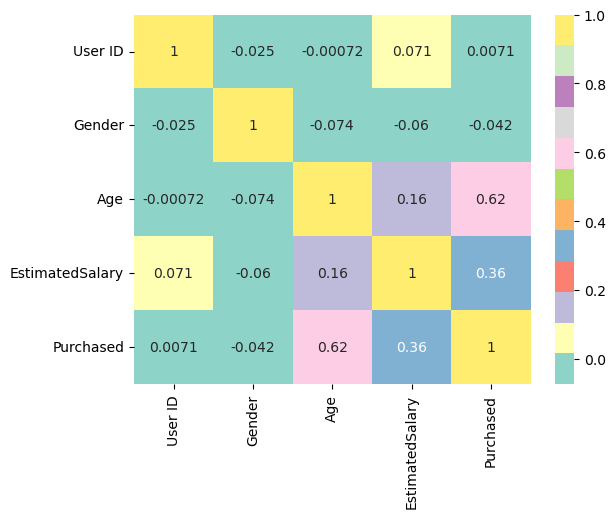

In [23]:
# The correlation matrix shows how each pair of numerical columns in the DataFrame is related to each other.
sns.heatmap(df.corr(),annot=True,cmap='Set3') 

### 4.2 Customer Purchase Bar Plot and Pie Chart
* The visualizations below show the number and percentage of customers who purchased and did not purchase the SUV.

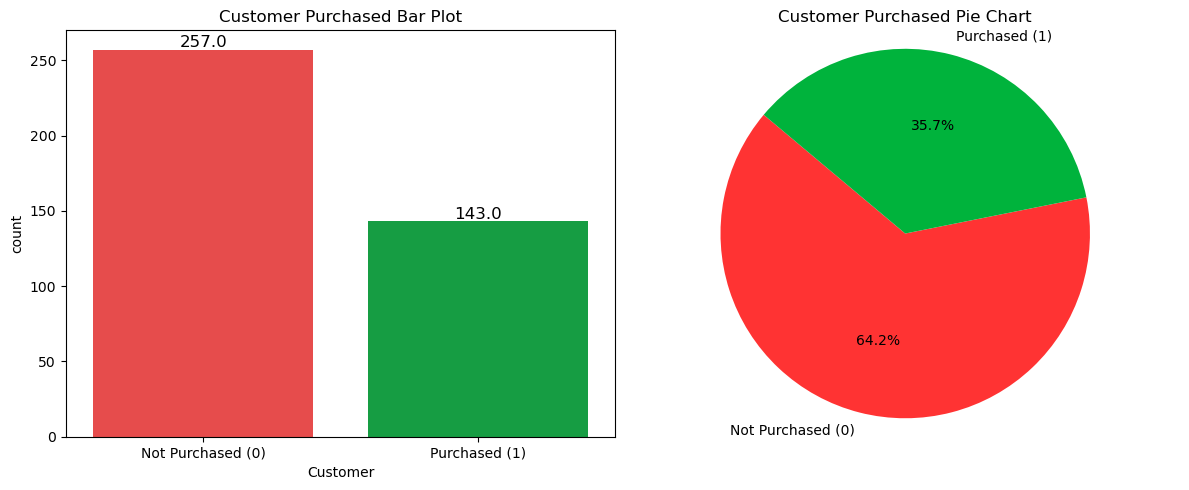

In [24]:
# Create a figure with two subplots: one for the countplot and one for the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the countplot on the left
sns.countplot(data=df, x="Purchased", palette=['#ff3333', '#00b33c'], ax=ax1)
ax1.set_title("Customer Purchased Bar Plot")
ax1.set_xlabel("Customer")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Not Purchased (0)", "Purchased (1)"])

# Show numbers above the bar plots
for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
        fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

# Plot the pie chart on the right
ax2.pie(
    df['Purchased'].value_counts().values,
    labels=['Not Purchased (0)', 'Purchased (1)'], autopct='%1.1f%%',
    colors=['#ff3333', '#00b33c'], startangle=140
)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax2.axis('equal')  
ax2.set_title("Customer Purchased Pie Chart")


# Show the combined plot
plt.tight_layout()
plt.show()

### 4.2 Customer Gender Bar Plot and Pie Chart
* The visualizations below show the number and percentage of customer genders.

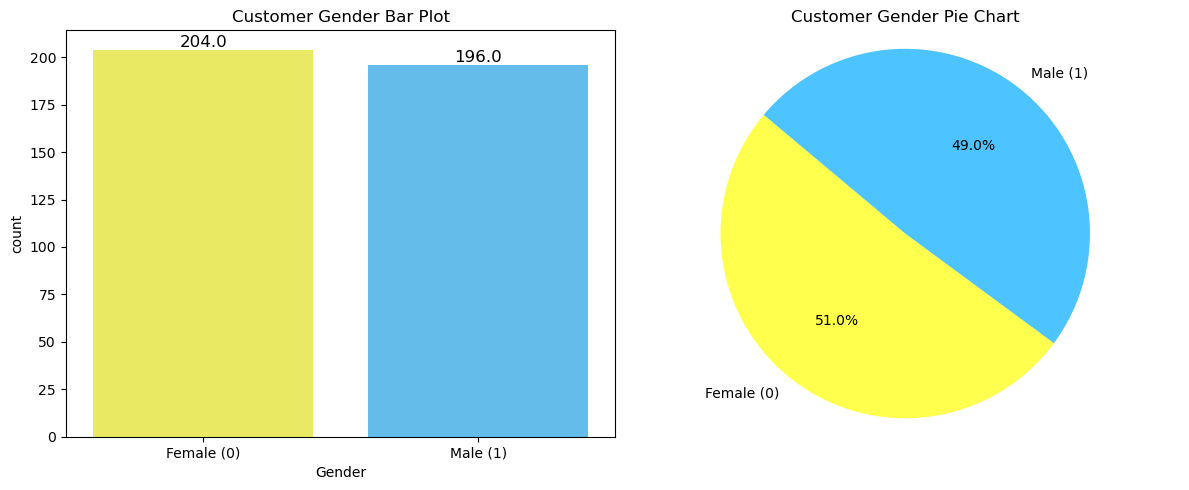

In [25]:
# Create a figure with two subplots: one for the countplot and one for the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the countplot on the left
sns.countplot(data=df, x="Gender", palette=['#ffff4d', '#4dc3ff'], ax=ax1)
ax1.set_title("Customer Gender Bar Plot")
ax1.set_xlabel("Gender")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Female (0)", "Male (1)"])

# Show numbers above the bar plots
for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
        fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

# Plot the pie chart on the right
ax2.pie(
    df['Gender'].value_counts().values,
    labels=['Female (0)', 'Male (1)'], autopct='%1.1f%%',
    colors=['#ffff4d', '#4dc3ff'], startangle=140
)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax2.axis('equal')  
ax2.set_title("Customer Gender Pie Chart")


# Show the combined plot
plt.tight_layout()
plt.show()

### 4.3 Distribution of Age
* The age skewness indicates a slightly positive-skewed distribution.

<Axes: xlabel='Age', ylabel='Count'>

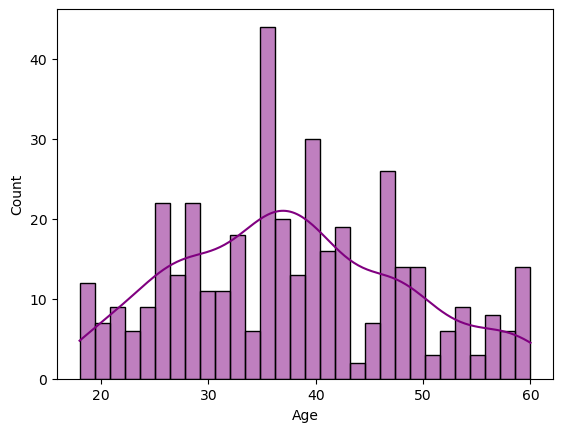

In [26]:
sns.histplot(df['Age'],kde=True,color='purple',bins=30)

### 4.4 Distribution of Estimated Salary
* The estimated salary skewness indicates a positive-skewed distribution.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

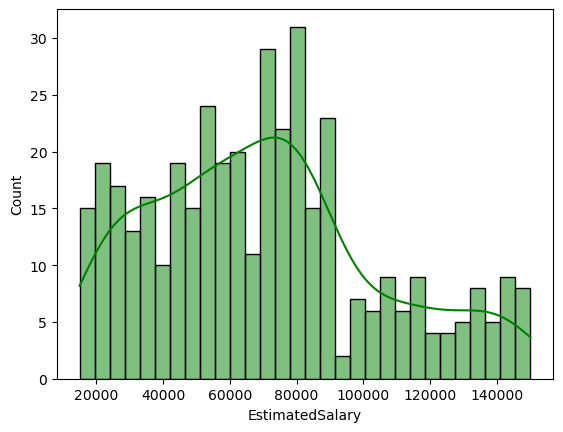

In [27]:
sns.histplot(df['EstimatedSalary'],kde=True,color='green',bins=30)

### 4.5 Line Plot of Estimated Salary Based on Age

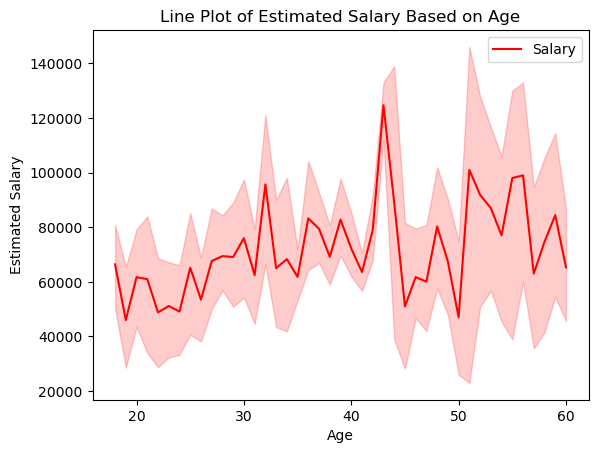

In [28]:
# Create your lineplot
sns.lineplot(y=df['EstimatedSalary'], x=df['Age'], color='red', label='Salary')

# Set the title
plt.title('Line Plot of Estimated Salary Based on Age')

# Set the x and y axis labels
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Add a legend to the plot
plt.legend(loc='best')

# Show the plot
plt.show()

## 5. Supervised Learning Data Pre-processing

### 5.1 Extract dependent and independent variables
We have taken (2, 3) for x because our independent variables are age and salary, which are at index 2, 3. And we have taken 4 for y variable because our dependent variable is at index 4. 

In [29]:
# Extract independent variables based on index (columns 2 and 3) and stores them in the variable 'x'
x = df.iloc[:, [2, 3]].values

# Extract dependent variable based on index (columns 4) and stores them in the variable 'y'
y = df.iloc[:, 4].values

### 5.2 Display Independent Variables

In [30]:
pd.DataFrame(x, columns=['Age', 'Estimated Salary'])

,Age,Estimated Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


### 5.3 Display Dependent Variable

In [31]:
pd.DataFrame(y, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


### 5.4 Splitting the dataset into training and test set for machine learning

In [32]:
# 'test_size=0.25' indicates that 25% of the data will be used as the testing set,
#  the remaining 75% will be used as the training set.

# 'random_state=0' is used to set a seed for the random number generator.
# It ensures that the data split is reproducible,
# meaning that if you run the code with the same seed again, you will get the same data split.

# 'x_train' contains the features for training, 'x_test' contains the features for testing,
# 'y_train' contains the target values for training, and 'y_test' contains the target values for testing.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)

### 5.5 Display independent (X) training set

In [33]:
pd.DataFrame(x_train, columns=['Age', 'Estimated Salary'])

,Age,Estimated Salary
0,44,39000
1,32,120000
2,38,50000
3,32,135000
4,52,21000
...,...,...
295,48,30000
296,29,43000
297,36,52000
298,27,54000


### 5.5 Display dependent (Y) training set

In [34]:
pd.DataFrame(y_train, columns=['Purchased'])

,Purchased
0,0
1,1
2,0
3,1
4,1
...,...
295,1
296,0
297,0
298,0


### 5.6 Display independent (X) test set

In [35]:
pd.DataFrame(x_test, columns=['Age', 'Estimated Salary'])

,Age,Estimated Salary
0,30,87000
1,38,50000
2,35,75000
3,30,79000
4,35,50000
...,...,...
95,27,96000
96,23,63000
97,48,33000
98,48,90000


### 5.7 Display dependent (Y) test set

In [36]:
pd.DataFrame(y_test, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,0
97,1
98,1


### 5.8 Feature Scaling
* In machine learning, it's often important to scale or standardize your features (input variables) to ensure that they have similar scales.
* We will do feature scaling because we want accurate result of predictions.
* Here we will only scale the independent variable because dependent variable have only 0 and 1 values.

In [37]:
# Create a StandardScaler object
st_x = StandardScaler()

# The 'fit_transform' method of the StandardScaler to standardize the training features ('x_train').
x_train = st_x.fit_transform(x_train)

# The 'transform' method of the StandardScaler to standardize the testing features ('x_test').
x_test = st_x.transform(x_test) 

### 5.9 Display training set feature scaling

In [38]:
pd.DataFrame(x_train, columns=['Age', 'Estimated Salary'])

,Age,Estimated Salary
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584
...,...,...
295,0.977778,-1.147645
296,-0.903834,-0.770734
297,-0.210609,-0.509796
298,-1.101899,-0.451810


### 5.10 Display test set feature scaling

In [39]:
pd.DataFrame(x_test, columns=['Age', 'Estimated Salary'])

,Age,Estimated Salary
0,-0.804802,0.504964
1,-0.012544,-0.567782
2,-0.309641,0.157046
3,-0.804802,0.273019
4,-0.309641,-0.567782
...,...,...
95,-1.101899,0.765902
96,-1.498028,-0.190872
97,0.977778,-1.060666
98,0.977778,0.591943


## 6. Supervised Machine Learning Classification Models
## 6.1 Logistic Regression Classification
* Logistic regression is a supervised machine learning algorithm that is used for classification tasks. It is a powerful tool for predicting the probability of a binary outcome, such as whether or not a user is likely to purchase a particular product or service.
* A binomial logistic regression will be used in this case since there are only two possible solutions in the purchase dependent variable, such as buy or not buy.

### 6.1.1 Fitting Logistic Regression
* Fitting Logistic Regression to the Training set.

In [40]:
# Create a logistic regression classifier object.
classifier = LogisticRegression(random_state=0)

# Train (fit) the logistic regression classifier on the training data.
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

### 6.1.2 Predicting the Test Result
* Predict the result by using test set data.

In [41]:
# Use the trained 'classifier' to make predictions on the test data 'x_test'.
y_pred = classifier.predict(x_test)

### 6.1.3 Display Prediction on the Test Data
* The output shows the predicted users who want to purchase or not purchase the car.

In [42]:
pd.DataFrame(y_pred, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,1


### 6.1.4 Classification Report (Test Accuracy of the result)
* The classification report provides various performance metrics such as precision, recall, F1-score, and support.

In [43]:
# Print a classification report
print(classification_report(y_test, y_pred))
accuracy_LR = round(accuracy_score(y_test,y_pred), 2)

print('-' * 92)
print("\033[1mClassification Report Explantion:\033[0m")
print("\033[1mAccuracy\033[0m =",accuracy_LR)
print("Means that the model makes correct predictions for",accuracy_LR*100,"% of the samples in the test dataset.")

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

--------------------------------------------------------------------------------------------
Classification Report Explantion:
Accuracy = 0.89
Means that the model makes correct predictions for 89.0 % of the samples in the test dataset.


### 6.1.5 Confusion Matrix (Test Accuracy of the result)
* Create the confusion matrix to check the accuracy of the classification.
* We can find the accuracy of the predicted result by interpreting the confusion matrix.

In [44]:
# Creating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns = ['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

# Calculate Correct Predicted Plots
correct_PAC = cm_df.iloc[0, 0]
correct_NAP = cm_df.iloc[1, 1]
correct_LR = correct_PAC + correct_NAP

# Calculate Wrong Predicted Plots
wrong_PAC = cm_df.iloc[0, 1]
wrong_NAP = cm_df.iloc[1, 0]
wrong_LR = wrong_PAC + wrong_NAP

print("We can interpret that:")
print(correct_PAC," + ",correct_NAP," = ",correct_LR," (Correct Predicted Plots)")
print(wrong_PAC," + ",wrong_NAP," = ",wrong_LR," (Wrong Predicted Plots)")
cm_df

We can interpret that:
65  +  24  =  89  (Correct Predicted Plots)
3  +  8  =  11  (Wrong Predicted Plots)


,Predicted Positive,Predicted Negative
Actual Positive,65,3
Actual Negative,8,24


### 6.1.6 Visualizing the Training Set Result

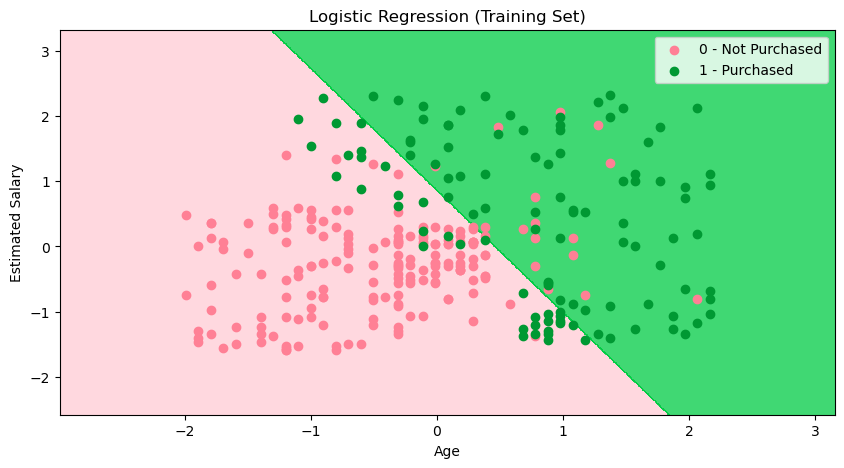

In [45]:
# Assigning the training data 'x_train' and 'y_train' to 'x_set' and 'y_set'
x_set, y_set = x_train, y_train

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(),
    x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#ffccd5','#00cc44'))
)

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#ff8095', '#009933'))(i),
        label = label
    )
    
# Add title, labels, legend, and show the plot.
plt.title('Logistic Regression (Training Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()
plt.show()

#### Logistic regression training set explaination:
* The above graph shows the training set result for logistic regression.
* The pink region is for those users who didn't buy the car, and the green region is for those users who purchased the car.
* The observation points reveal two distinct regions, pink and green, with some green points within the pink region and some pink points within the green region.
* The pink point observations are for users who did not purchase the SUV car (for example, 0 = not purchased).
* The green point observations are for users who purchased the SUV car (for example, 1 = purchased).
* All of these data points are observation points from the training set, and they represent the outcome for the purchased variables.
* As we can see from the graph, the classifier is a straight line or linear in nature, as we have used the linear model for logistic regression.
* We can also estimate from the graph that the younger users with a low salary did not purchase the car, whereas the older users with a high estimated salary did.

### 6.1.7 Visualizing the Test Set Result
* After the training of the model, we will now test the result for new observations (Test set).

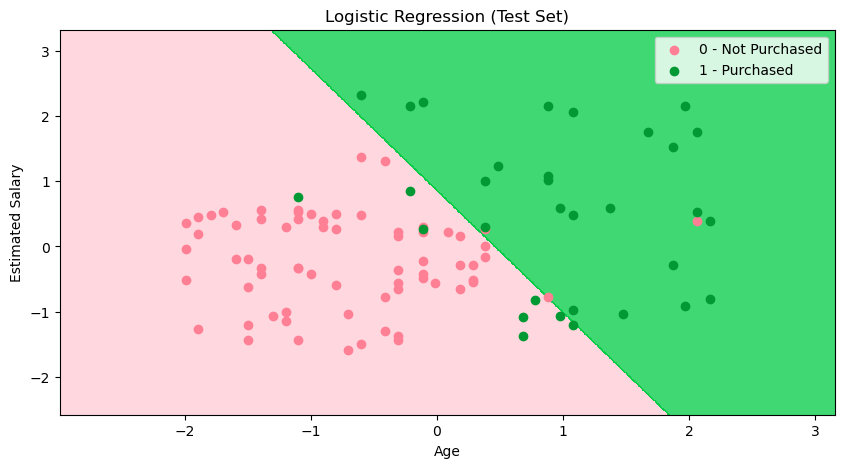

In [46]:
# Assigning the testing data 'x_test' and 'y_test' to 'x_set' and 'y_set'
x_set, y_set = x_test, y_test

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(np.arange(
    start = x_set[:, 0].min() - 1,
    stop = x_set[:, 0].max() + 1, step = 0.01
),
                     
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(),
    x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#ffccd5','#00cc44'))
)

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#ff8095', '#009933'))(i),
        label = label
    )

# Add title, labels, legend, and show the plot.
plt.title('Logistic Regression (Test Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

#### Logistic regression test set explaination:
* The above graph shows the test set results for logistic regression.
* The graph is divided into two regions (pink and green).
* Most of the green observations are in the green region, and most of the pink observations are in the pink region.
* As a result, we can say it is a good prediction and model with 89% accuracy.
* Some of the green and purple data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (11% incorrect output).

## 6.2 K-Nearest Neighbor (KNN) Classification
K-Nearest Neighbor (KNN) is a non-parametric supervised machine learning algorithm that can be used for both classification and regression tasks. It stores all available data and classifies a new data point based on its similarity to the existing data.

### 6.2.1 Fitting KNN classifier
* Fitting KNN classifier to the Training data.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-nearest neighbors (KNN) classifier object.
# 'n_neighbors' specifies the number of nearest neighbors to consider (in this case, 5).
# 'metric' specifies the distance metric used to measure similarity ('minkowski' in this case).
# 'p' is a parameter for the Minkowski distance metric (p=2 corresponds to Euclidean distance).

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 

# Train (fit) the KNN classifier on the training data.
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

### 6.2.2 Predicting the Test Result
* Predict the result by using test set data.

In [48]:
# Using the trained classifier to make predictions on the test data.
y_pred = classifier.predict(x_test)

### 6.2.3 Display Prediction on the Test Data
* The output shows the predicted users who want to purchase or not purchase the car.

In [49]:
pd.DataFrame(y_pred, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,1
98,1


### 6.2.4 Classification Report (Test Accuracy of the result)
* The classification report provides various performance metrics such as precision, recall, F1-score, and support.

In [50]:
# Print a classification report
print(classification_report(y_test, y_pred))
accuracy_KNN = round(accuracy_score(y_test,y_pred), 2)

print('-' * 92)
print("\033[1mClassification Report Explantion:\033[0m")
print("\033[1mAccuracy\033[0m =",accuracy_KNN)
print("Means that the model makes correct predictions for",accuracy_KNN*100,"% of the samples in the test dataset.")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

--------------------------------------------------------------------------------------------
Classification Report Explantion:
Accuracy = 0.93
Means that the model makes correct predictions for 93.0 % of the samples in the test dataset.


### 6.2.5 Confusion Matrix (Test Accuracy of the result)
* Create the confusion matrix to check the accuracy of the classification.
* We can find the accuracy of the predicted result by interpreting the confusion matrix.

In [51]:
# Creating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns = ['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

# Calculate Correct Predicted Plots
correct_PAC = cm_df.iloc[0, 0]
correct_NAP = cm_df.iloc[1, 1]
correct_KNN = correct_PAC + correct_NAP

# Calculate Wrong Predicted Plots
wrong_PAC = cm_df.iloc[0, 1]
wrong_NAP = cm_df.iloc[1, 0]
wrong_KNN = wrong_PAC + wrong_NAP

print("We can interpret that:")
print(correct_PAC," + ",correct_NAP," = ",correct_KNN," (Correct Predicted Plots)")
print(wrong_PAC," + ",wrong_NAP," = ",wrong_KNN," (Wrong Predicted Plots)")
cm_df

We can interpret that:
64  +  29  =  93  (Correct Predicted Plots)
4  +  3  =  7  (Wrong Predicted Plots)


,Predicted Positive,Predicted Negative
Actual Positive,64,4
Actual Negative,3,29


### 6.2.6 Visualizing the Training Set Result

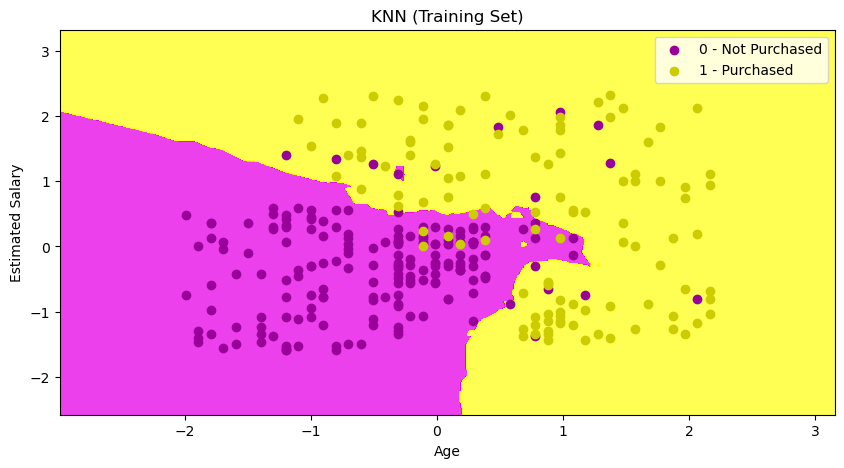

In [52]:
# Assigning the training data 'x_train' and 'y_train' to 'x_set' and 'y_set'
x_set, y_set = x_train, y_train

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#e600e6', '#ffff1a'))
)

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#990099', '#cccc00'))(i),
        label = label
    )
    
# Add title, labels, legend, and show the plot.
plt.title('KNN (Training Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()
plt.show()

#### KNN training set explaination:
* The above graph shows the training set result for the KNN algorithm.
* The purple region is for those users who didn't buy the car, and the yellow region is for those users who purchased the car.
* The observation points reveal two distinct regions, purple and yellow, with some purple points within the yellow region and some yellow points within the purple region.
* The purple point observations are for users who did not purchase the SUV car (for example, 0 = not purchased).
* The yellow point observations are for users who purchased the SUV car (for example, 1 = purchased).
* All of these data points are observation points from the training set, and they represent the outcome for the purchased variables.
* The graph is showing an irregular boundary instead of any straight line or any curve because it is a KNN algorithm, which is finding the nearest neighbor.

### 6.2.7 Visualizing the Test Set Result
* After the training of the model, we will now test the result for new observations (Test set). 

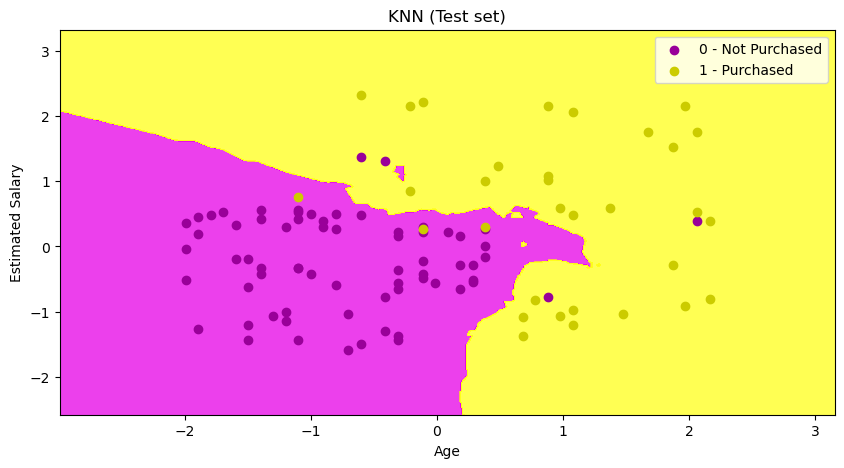

In [53]:
# Assigning the testing data 'x_test' and 'y_test' to 'x_set' and 'y_set'
x_set, y_set = x_test, y_test

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(
        start = x_set[:, 0].min() - 1,
        stop = x_set[:, 0].max() + 1, step = 0.01
    ),
    
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)
          
# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#e600e6', '#ffff1a'))
)  

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#990099', '#cccc00'))(i),
        label = label
    )

# Add title, labels, legend, and show the plot.
plt.title('KNN (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

#### KNN test set explaination:
* The above graph shows the test set results for the KNN algorithm used to prevent overfitting.
* The graph is divided into two regions (purple and yellow).
* Although the graph shows a good result with 93% accuracy, there are still some purple points in the yellow region and some yellow points in the purple region, which can be ignored as we have already calculated this error using the confusion matrix (7% incorrect output).

## 6.3 Support Vector Machine (SVM) Classification
* A support vector machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. However, primarily, it is used for classification problems in machine learning. It works by finding a hyperplane that best separates the data points of different classes.
* The linear SVM is used in this example to linearly separate data into two classes using a single straight line.

### 6.3.1 Fitting SVM Classifier
* Fitting SVM classifier to the Training data

In [54]:
# Creating a Support Vector Classifier (SVC)
# The 'kernel' parameter specifies the type of kernel to be used, and in this case, it's set to 'linear'
# indicating a linear kernel for the SVM.
classifier = SVC(kernel='linear', random_state=0)

# Train (fit) the Support Vector Classifier (SVC) on the training data.
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

### 6.3.2 Predicting the Test Result
* Predict the result by using test set data.

In [55]:
# Using the trained classifier to make predictions on the test data.
y_pred = classifier.predict(x_test)

### 6.3.3 Display Prediction on the Test Data
* The output shows the predicted users who want to purchase or not purchase the car.

In [56]:
pd.DataFrame(y_pred, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,1


### 6.3.4 Classification Report (Test Accuracy of the result)
* The classification report provides various performance metrics such as precision, recall, F1-score, and support.

In [57]:
# Print a classification report
print(classification_report(y_test, y_pred))
accuracy_SVM = round(accuracy_score(y_test,y_pred), 2)

print('-' * 92)
print("\033[1mClassification Report Explantion:\033[0m")
print("\033[1mAccuracy\033[0m =",accuracy_SVM)
print("Means that the model makes correct predictions for",accuracy_SVM*100,"% of the samples in the test dataset.")

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

--------------------------------------------------------------------------------------------
Classification Report Explantion:
Accuracy = 0.9
Means that the model makes correct predictions for 90.0 % of the samples in the test dataset.


### 6.3.5 Confusion Matrix (Test Accuracy of the result)
* Create the confusion matrix to check the accuracy of the classification.
* We can find the accuracy of the predicted result by interpreting the confusion matrix.

In [58]:
# Creating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns = ['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

# Calculate Correct Predicted Plots
correct_PAC = cm_df.iloc[0, 0]
correct_NAP = cm_df.iloc[1, 1]
correct_SVM = correct_PAC + correct_NAP

# Calculate Wrong Predicted Plots
wrong_PAC = cm_df.iloc[0, 1]
wrong_NAP = cm_df.iloc[1, 0]
wrong_SVM = wrong_PAC + wrong_NAP

print("We can interpret that:")
print(correct_PAC," + ",correct_NAP," = ",correct_SVM," (Correct Predicted Plots)")
print(wrong_PAC," + ",wrong_NAP," = ",wrong_SVM," (Wrong Predicted Plots)")
cm_df

We can interpret that:
66  +  24  =  90  (Correct Predicted Plots)
2  +  8  =  10  (Wrong Predicted Plots)


,Predicted Positive,Predicted Negative
Actual Positive,66,2
Actual Negative,8,24


### 6.3.6 Visualizing the Training Set Result

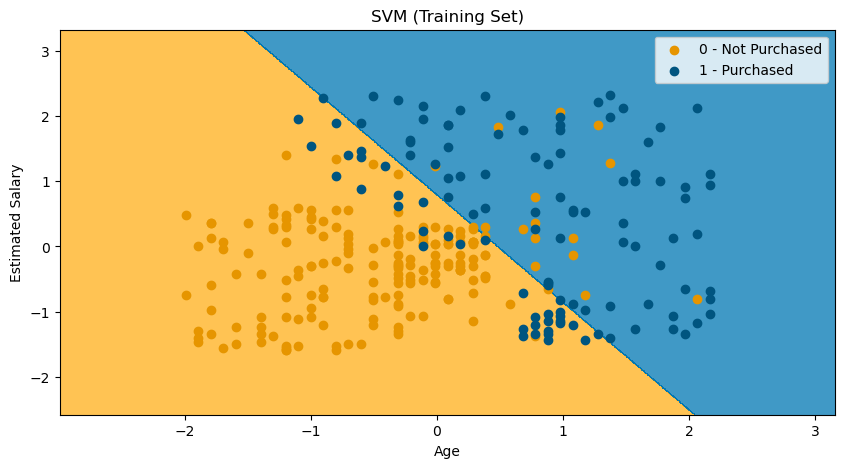

In [59]:
# Assigning the training data 'x_train' and 'y_train' to 'x_set' and 'y_set'
x_set, y_set = x_train, y_train

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#ffaf1a', '#0077b3'))
)

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#e69500', '#005580'))(i),
        label = label
    )
    
# Add title, labels, legend, and show the plot.
plt.title('SVM (Training Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()
plt.show()

#### SVM training set explaination:
* The above graph shows the training set result for SVM model.
* The output appears similar to the logistic regression.
* The orange region is for those users who didn't buy the car, and the blue region is for those users who purchased the car.
* The observation points reveal two distinct regions, orange and blue, with some orange points within the blue region and some blue points within the orange region.
* The orange point observations are for users who did not purchase the SUV car (for example, 0 = not purchased).
* The blue point observations are for users who purchased the SUV car (for example, 1 = purchased).
* All of these data points are observation points from the training set, and they represent the outcome for the purchased variables.
* In the output, we got the straight line as a hyperplane because we used a linear kernel in the classifier.

### 6.3.7 Visualizing the Test Set Result
* After the training of the model, we will now test the result for new observations (Test set). 

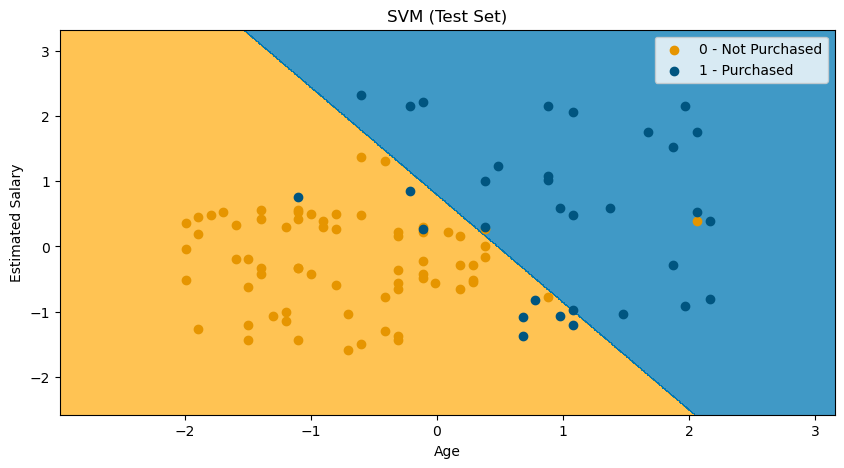

In [60]:
# Assigning the testing data 'x_test' and 'y_test' to 'x_set' and 'y_set'
x_set, y_set = x_test, y_test

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(
        start = x_set[:, 0].min() - 1,
        stop = x_set[:, 0].max() + 1, step = 0.01
    ),
    
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)
          
# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#ffaf1a', '#0077b3'))
)  

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#e69500', '#005580'))(i),
        label = label
    )

# Add title, labels, legend, and show the plot.
plt.title('SVM (Test Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()

#### SVM test set explaination:
* The above graph shows the test set results for SVM model.
* The graph is divided into two regions (orange and blue).
* Most of the blue observations are in the blue region, and most of the orange observations are in the orange region.
* As a result, we can say it is a good prediction and model with 90% accuracy.
* Some of the orange and blue data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (10% incorrect output).

## 6.4 Naïve Bayes Classification
* Naïve Bayes is a simple probabilistic supervised machine learning algorithm that is used for classification tasks. It is based on Bayes' theorem, which is a way of calculating the probability of an event occurring given the probability of other events.
* The Gaussian model, which assumes that features are distributed in a regular manner, will be used in this example.

### 6.4.1 Fitting Naïve Bayes Classifier
* Fitting Naïve Bayes classifier to the Training set data.

In [61]:
# Create a Gaussian Naive Bayes (GaussianNB) classifier object.
classifier = GaussianNB()

# Train (fit) the GaussianNB classifier on the training data.
classifier.fit(x_train, y_train) 

GaussianNB()

### 6.4.2 Predicting the Test Result
* Predict the result by using test set data.

In [62]:
# Using the trained classifier to make predictions on the test data.
y_pred = classifier.predict(x_test) 

### 6.4.3 Display Prediction on the Test Data
* The output shows the predicted users who want to purchase or not purchase the car.

In [63]:
pd.DataFrame(y_pred, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,1
98,1


### 6.4.4 Classification Report (Test Accuracy of the result)
* The classification report provides various performance metrics such as precision, recall, F1-score, and support.

In [64]:
# Print a classification report
print(classification_report(y_test, y_pred))
accuracy_NB = round(accuracy_score(y_test,y_pred), 2)

print('-' * 92)
print("\033[1mClassification Report Explantion:\033[0m")
print("\033[1mAccuracy\033[0m =",accuracy_NB)
print("Means that the model makes correct predictions for",accuracy_NB*100,"% of the samples in the test dataset.")

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100

--------------------------------------------------------------------------------------------
Classification Report Explantion:
Accuracy = 0.9
Means that the model makes correct predictions for 90.0 % of the samples in the test dataset.


### 6.4.5 Confusion Matrix (Test Accuracy of the result)
* Create the confusion matrix to check the accuracy of the classification.
* We can find the accuracy of the predicted result by interpreting the confusion matrix.

In [65]:
# Creating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns = ['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

# Calculate Correct Predicted Plots
correct_PAC = cm_df.iloc[0, 0]
correct_NAP = cm_df.iloc[1, 1]
correct_NB = correct_PAC + correct_NAP

# Calculate Wrong Predicted Plots
wrong_PAC = cm_df.iloc[0, 1]
wrong_NAP = cm_df.iloc[1, 0]
wrong_NB = wrong_PAC + wrong_NAP

print("We can interpret that:")
print(correct_PAC," + ",correct_NAP," = ",correct_NB," (Correct Predicted Plots)")
print(wrong_PAC," + ",wrong_NAP," = ",wrong_NB," (Wrong Predicted Plots)")
cm_df

We can interpret that:
65  +  25  =  90  (Correct Predicted Plots)
3  +  7  =  10  (Wrong Predicted Plots)


,Predicted Positive,Predicted Negative
Actual Positive,65,3
Actual Negative,7,25


### 6.4.6 Visualizing the Training Set Result

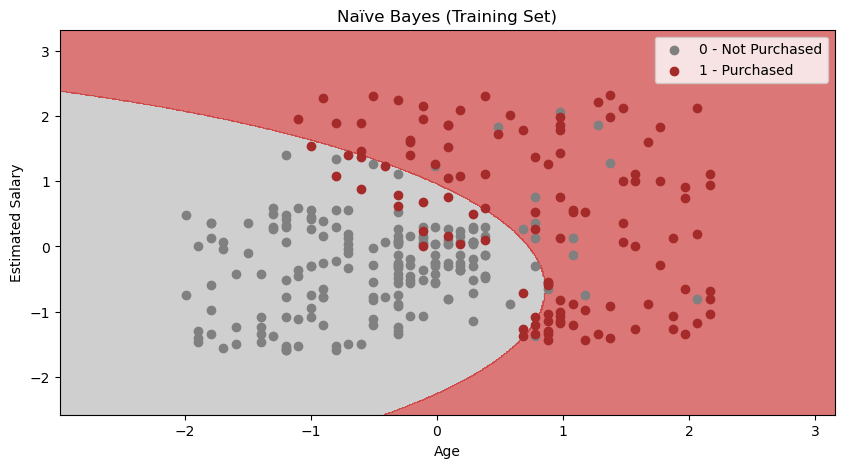

In [66]:
# Assigning the training data 'x_train' and 'y_train' to 'x_set' and 'y_set'
x_set, y_set = x_train, y_train

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#c0c0c0', '#d04949'))
)

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#808080', '#a52a2a'))(i),
        label = label
    )
    
# Add title, labels, legend, and show the plot.
plt.title('Naïve Bayes (Training Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()
plt.show()

#### Naïve Bayes training set explaination:
* The above graph shows the training set result for naïve bayes model.
* The silver region is for those users who didn't buy the car, and the brown region is for those users who purchased the car.
* The observation points reveal two distinct regions, silver and brown, with some brown points within the silver region and some silver points within the brown region.
* The silver point observations are for users who did not purchase the SUV car (for example, 0 = not purchased).
* The brown point observations are for users who purchased the SUV car (for example, 1 = purchased).
* All of these data points are observation points from the training set, and they represent the outcome for the purchased variables.
* We can observe that the Nave Bayes classifier has separated the data points with the fine boundary in the above output.
* It is a Gaussian curve, as we have used the GaussianNB classifier in our code.

### 6.4.7 Visualizing the Test Set Result
* After the training of the model, we will now test the result for new observations (Test set).

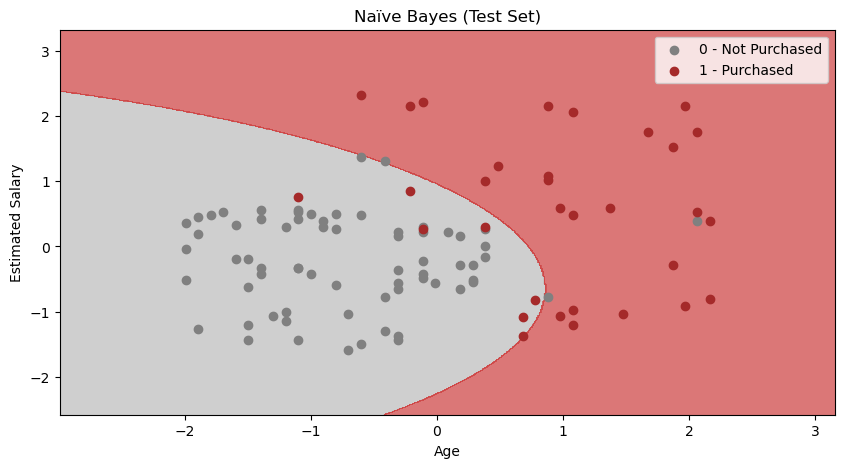

In [67]:
# Assigning the testing data 'x_test' and 'y_test' to 'x_set' and 'y_set'
x_set, y_set = x_test, y_test

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(
        start = x_set[:, 0].min() - 1,
        stop = x_set[:, 0].max() + 1, step = 0.01
    ),
    
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)
          
# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#c0c0c0', '#d04949'))
)  

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#808080', '#a52a2a'))(i),
        label = label
    )

# Add title, labels, legend, and show the plot.
plt.title('Naïve Bayes (Test Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()

#### Naïve Bayes test set explaination:
* The above graph shows the test set results for naïve bayes model.
* The graph is divided into two regions (silver and brown).
* Most of the brown observations are in the brown region, and most of the silver observations are in the silver region.
* But still there are some wrong predictions that we have calculated in the confusion matrix (10% incorrect outputs).
* But we can say this is a pretty good classifier with 90% accuracy.

## 6.5 Decision Tree Classification
A Decision Tree is a supervised learning technique that can be used for both classification and regression problems, but mostly it is preferred for solving classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

### 6.5.1 Fitting Decision Tree Classifier
* Fitting decision tree classifier to the Training set data.

In [68]:
# Create a Decision Tree classifier object.
# 'criterion='entropy'' specifies that the information gain using entropy will be used as the splitting criterion.
# 'random_state=0' sets the random seed for reproducibility.
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train (fit) the Decision Tree classifier on the training data.
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 6.5.2 Predicting the Test Result
* Predict the result by using test set data.

In [69]:
# Using the trained classifier to make predictions on the test data.
y_pred = classifier.predict(x_test)

### 6.5.3 Display Prediction on the Test Data
* The output shows the predicted users who want to purchase or not purchase the car.

In [70]:
pd.DataFrame(y_pred, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,0
97,1
98,1


### 6.5.4 Classification Report (Test Accuracy of the result)
* The classification report provides various performance metrics such as precision, recall, F1-score, and support.

In [71]:
# Print a classification report
print(classification_report(y_test, y_pred))
accuracy_DT = round(accuracy_score(y_test,y_pred), 2)

print('-' * 92)
print("\033[1mClassification Report Explantion:\033[0m")
print("\033[1mAccuracy\033[0m =",accuracy_DT)
print("Means that the model makes correct predictions for",accuracy_DT*100,"% of the samples in the test dataset.")

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100

--------------------------------------------------------------------------------------------
Classification Report Explantion:
Accuracy = 0.91
Means that the model makes correct predictions for 91.0 % of the samples in the test dataset.


### 6.5.5 Confusion Matrix (Test Accuracy of the result)
* Create the confusion matrix to check the accuracy of the classification.
* We can find the accuracy of the predicted result by interpreting the confusion matrix.

In [72]:
# Creating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns = ['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

# Calculate Correct Predicted Plots
correct_PAC = cm_df.iloc[0, 0]
correct_NAP = cm_df.iloc[1, 1]
correct_DT = correct_PAC + correct_NAP

# Calculate Wrong Predicted Plots
wrong_PAC = cm_df.iloc[0, 1]
wrong_NAP = cm_df.iloc[1, 0]
wrong_DT = wrong_PAC + wrong_NAP

print("We can interpret that:")
print(correct_PAC," + ",correct_NAP," = ",correct_DT," (Correct Predicted Plots)")
print(wrong_PAC," + ",wrong_NAP," = ",wrong_DT," (Wrong Predicted Plots)")
cm_df

We can interpret that:
62  +  29  =  91  (Correct Predicted Plots)
6  +  3  =  9  (Wrong Predicted Plots)


,Predicted Positive,Predicted Negative
Actual Positive,62,6
Actual Negative,3,29


### 6.5.6 Visualizing the Training Set Result

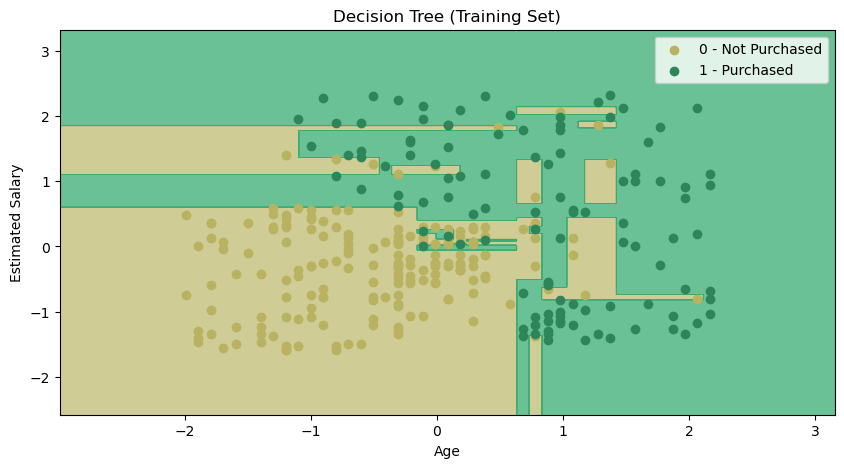

In [73]:
# Assigning the training data 'x_train' and 'y_train' to 'x_set' and 'y_set'
x_set, y_set = x_train, y_train

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#c0bb72', '#39ac73'))
)

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#b8b261', '#2d8659'))(i),
        label = label
    )
    
# Add title, labels, legend, and show the plot.
plt.title('Decision Tree (Training Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()
plt.show()

#### Decision Tree training set explaination:
* The above graph shows the training set result for decision tree algorithm.
* The khaki region is for those users who didn't buy the car, and the green region is for those users who purchased the car.
* The observation points reveal two distinct regions, khaki and green, with some green points within the khaki region and some khaki points within the green region.
* The khaki point observations are for users who did not purchase the SUV car (for example, 0 = not purchased).
* The green point observations are for users who purchased the SUV car (for example, 1 = purchased).
* All of these data points are observation points from the training set, and they represent the outcome for the purchased variables.
* The above output is completely different from the rest classification models. It has both vertical and horizontal lines that are splitting the dataset according to the age and estimated salary variable.
* As can be seen, the tree is attempting to capture each dataset, resulting in overfitting.

### 6.5.7 Visualizing the Test Set Result
* After the training of the model, we will now test the result for new observations (Test set).

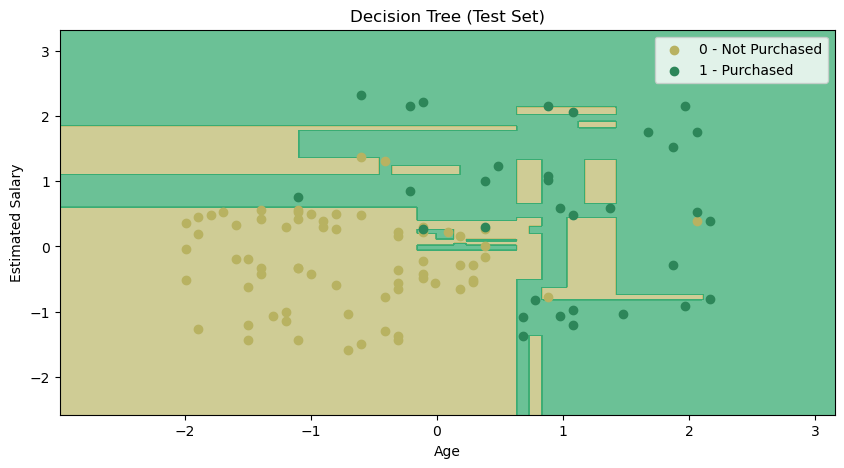

In [74]:
# Assigning the testing data 'x_test' and 'y_test' to 'x_set' and 'y_set'
x_set, y_set = x_test, y_test

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(
        start = x_set[:, 0].min() - 1,
        stop = x_set[:, 0].max() + 1, step = 0.01
    ),
    
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)
          
# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#c0bb72', '#39ac73'))
)  

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#b8b261', '#2d8659'))(i),
        label = label
    )

# Add title, labels, legend, and show the plot.
plt.title('Decision Tree (Test Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()

#### Decision Tree test set explaination:
* The above graph shows the test set results for decision tree algorithm.
* The graph is divided into two regions (khaki and green).
* Most of the green observations are in the green region, and most of the khaki observations are in the khaki region.
* As a result, we can say it is a good prediction and model with 91% accuracy.
* Some of the green and khaki data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (9% incorrect output).

## 6.6 Random Forest Classification
Random forest is a supervised learning algorithm that is used for both classification and regression tasks. It is based on the concept of ensemble learning, which is the process of combining multiple classifiers to solve a complex problem and improve the performance of the model. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

### 6.6.1 Fitting Random Forest Classifier
* Fitting random forest classifier to the Training set data.

In [75]:
# Create a Random Forest Classifier object.
# 'n_estimators' The required number of trees in the Random Forest. The default value is 10.
# 'criterion': The criterion used for splitting nodes in the decision trees ("entropy" in this case).
classifier = RandomForestClassifier(n_estimators= 10, criterion="entropy")

# Train (fit) the Random Forest Classifier on the training data.
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

### 6.6.2 Predicting the Test Result
* Predict the result by using test set data.

In [76]:
# Using the trained classifier to make predictions on the test data.
y_pred = classifier.predict(x_test)

### 6.6.3 Display Prediction on the Test Data
* The output shows the predicted users who want to purchase or not purchase the car.

In [77]:
pd.DataFrame(y_pred, columns=['Purchased'])

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,0
97,1
98,1


### 6.6.4 Classification Report (Test Accuracy of the result)
* The classification report provides various performance metrics such as precision, recall, F1-score, and support.

In [78]:
# Print a classification report
print(classification_report(y_test, y_pred))
accuracy_RF = round(accuracy_score(y_test,y_pred), 2)

print('-' * 92)
print("\033[1mClassification Report Explantion:\033[0m")
print("\033[1mAccuracy\033[0m =",accuracy_RF)
print("Means that the model makes correct predictions for",accuracy_RF*100,"% of the samples in the test dataset.")

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.91      0.94      0.92        32

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

--------------------------------------------------------------------------------------------
Classification Report Explantion:
Accuracy = 0.95
Means that the model makes correct predictions for 95.0 % of the samples in the test dataset.


### 6.6.5 Confusion Matrix (Test Accuracy of the result)
* Create the confusion matrix to check the accuracy of the classification.
* We can find the accuracy of the predicted result by interpreting the confusion matrix.

In [79]:
# Creating the confusion matrix  
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns = ['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

# Calculate Correct Predicted Plots
correct_PAC = cm_df.iloc[0, 0]
correct_NAP = cm_df.iloc[1, 1]
correct_RF = correct_PAC + correct_NAP

# Calculate Wrong Predicted Plots
wrong_PAC = cm_df.iloc[0, 1]
wrong_NAP = cm_df.iloc[1, 0]
wrong_RF = wrong_PAC + wrong_NAP

print("We can interpret that:")
print(correct_PAC," + ",correct_NAP," = ",correct_RF," (Correct Predicted Plots)")
print(wrong_PAC," + ",wrong_NAP," = ",wrong_RF," (Wrong Predicted Plots)")
cm_df

We can interpret that:
65  +  30  =  95  (Correct Predicted Plots)
3  +  2  =  5  (Wrong Predicted Plots)


,Predicted Positive,Predicted Negative
Actual Positive,65,3
Actual Negative,2,30


### 6.6.6 Visualizing the Training Set Result
* To visualize the training set result we will plot a graph for the Random forest classifier.
* The classifier will predict yes or No for the users who have either Purchased or Not purchased the SUV car.

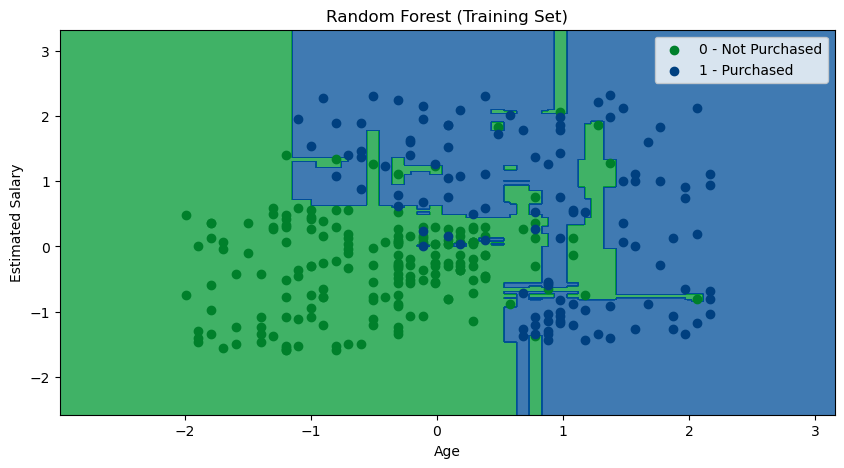

In [80]:
# Assigning the training data 'x_train' and 'y_train' to 'x_set' and 'y_set'
x_set, y_set = x_train, y_train

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#009933', '#004d99'))
)

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#00802b', '#004080'))(i),
        label = label
    )
    
# Add title, labels, legend, and show the plot.
plt.title('Random Forest (Training Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()
plt.show()

#### Random Forest training set explaination:
* The above image is the visualization result for the random forest classifier working with the training set result.
* It is very similar to the decision tree classifier.
* The green region is for those users who didn't buy the car, and the blue region is for those users who purchased the car.
* The observation points reveal two distinct regions, green and blue, with some blue points within the green region and some green points within the blue region.
* The green point observations are for users who did not purchase the SUV car (for example, 0 = not purchased).
* The blue point observations are for users who purchased the SUV car (for example, 1 = purchased).
* All of these data points are observation points from the training set, and they represent the outcome for the purchased variables.
* In the random forest classifier, we have taken 10 trees that have predicted yes or no for the purchased variable.
* The classifier took the majority of the predictions and provided the result. It calculated the result based on the majority of the predictions.

### 6.6.7 Visualizing the Test Set Result
* After the training of the model, we will now test the result for new observations (Test set).

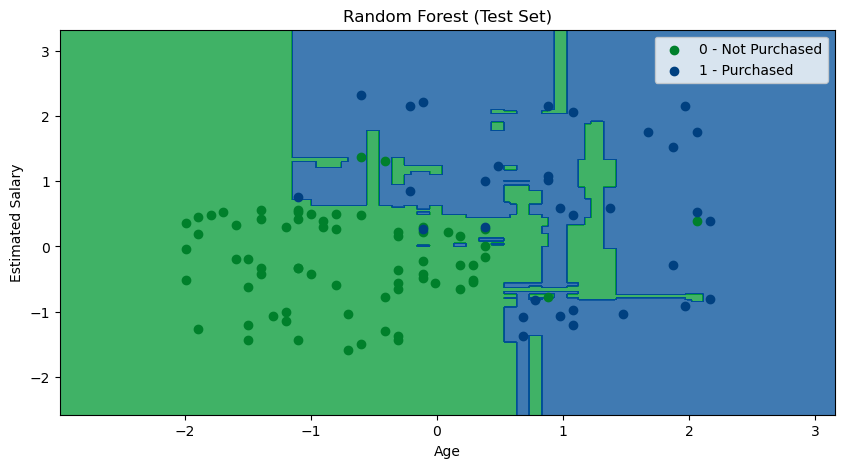

In [81]:
# Assigning the testing data 'x_test' and 'y_test' to 'x_set' and 'y_set'
x_set, y_set = x_test, y_test

# Set graph size
plt.figure(figsize=(10, 5))

# Create a meshgrid 'x1' and 'x2' for plotting decision boundaries.
x1, x2 = np.meshgrid(
    np.arange(
        start = x_set[:, 0].min() - 1,
        stop = x_set[:, 0].max() + 1, step = 0.01
    ),
    
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)
          
# Create a filled contour plot based on the predictions.
plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('#009933', '#004d99'))
)  

# Set the plot limits to match the range of the meshgrid.
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())
    
# Iterate over unique class labels in 'y_set' for scatter plotting.
for i, j in enumerate(np.unique(y_set)):
    label = f'{j} - {"Not Purchased" if j == 0 else "Purchased"}'
    
    # Scatter plot the data points in 'x_set' for each class.
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c = ListedColormap(('#00802b', '#004080'))(i),
        label = label
    )

# Add title, labels, legend, and show the plot.
plt.title('Random Forest (Test Set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()

#### Random Forest test set explaination:
* The above graph shows the test set results for the random forest model.
* The graph is divided into two regions (blue and green).
* Most of the green observations are in the green region, and most of the blue observations are in the blue region.
* As a result, we can say it is the best prediction compared to other models with 95% accuracy.
* Without the overfitting problem, we can confirm that there are a minimum of 5% inaccurate predictions as calculated in the confusion matrix.

## 7. Compare Models Performance

In [82]:
df_models = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'KNN',
        'SVM',
        'Naïve Bayes',
        'Decision Tree',
        'Random Forest'
    ],        
    'Accuracy (%)': [
        accuracy_LR*100,
        accuracy_KNN*100,
        accuracy_SVM*100,
        accuracy_NB*100,
        accuracy_DT*100,
        accuracy_RF*100
    ]
})

df_models

,Model,Accuracy (%)
0,Logistic Regression,89.0
1,KNN,93.0
2,SVM,90.0
3,Naïve Bayes,90.0
4,Decision Tree,91.0
5,Random Forest,95.0


## 8. Conclusion
Random Forest stands out as the top-performing model in terms of accuracy, achieving an impressive 95%. KNN and Decision Tree also performed well with 93% and 91% accuracy, respectively. Logistic Regression, SVM, and Naïve Bayes also delivered solid performances with a range from 89% to 90%. However, it's essential to consider other factors like model interpretability, computational complexity, and suitability for the specific problem when choosing a model for deployment.<br>

## 9. Reflections

### 9.1 Decision-Making Process:
* <b>Choosing supervised learning over unsupervised learning:</b> Supervised learning was used for this assignment because the dataset contains labeled data that can be used for classification. In other words, each data point in the dataset has a known output value. In this case, the output value is whether or not the user purchased the SUV car based on certain features such as age and estimated salary.
* <b>Encoding categorical data:</b> Gender and purchase contained categorical data, so I encoded them into 0 and 1 before building the model.
* <b>Logistic Regression Classification:</b> A binomial logistic regression was chosen over multinomial and ordinal logistic regression because there are only two possible solutions in the labeled data (purchased column), such as buy or not buy. The linear logistic regression model was used since the dataset was relatively small, so a linear model was able to fit the data well without overfitting.
* <b>KNN Classification:</b> n_neighbors=5 and metric='minkowski' was chosen in KNN classification because they are the common default configurations.
* <b>SVM Classification:</b> The linear SVM was chosen over the non-linear SVM since I wanted to linearly separate data into two classes using a single straight line.
* <b>Naïve Bayes Classification:</b> The Gaussian model was chosen over the Multinomial and Bernoulli classifiers since I assumed that features in the dataset are distributed in a normal manner.
* <b>Decision Tree classification:</b> I used 'entropy' as the criterion for both the decision tree and random forest classifications since I wanted to create more balanced splits by prioritizing classes that are underrepresented, which can lead to better predictions for the minority class.
* <b>Random Forest classification:</b> I used n_estimators = 10 in a random forest model because I wanted to create 10 decision trees since I had a small dataset, so using a value of 10 for n_estimators was a good compromise between complexity and performance.

### 9.2 What I Learned From This Assignment
1. <b>Supervised learning data pre-processing</b>, which includes extracting and displaying dependent and independent variables, splitting the dataset into training and test sets for machine learning, and feature scaling for standardizing input variables to ensure that they have similar scales.
2. <b>Fitting multiple supervised learning classification models</b> such as binomial logistic regression, k-nearest neighbor, linear support vector machine, gaussian naïve bayes, decision tree, and a random forest classifier.
3. <b>Predicting and displaying the test result</b> for different supervised learning models.
4. <b>Testing the accuracy of the results of different supervised learning models</b> using the classification report and confusion matrix.
5. <b>Visualizing the training and testing set results</b> of different supervised learning models.
6. <b>Compare and identify the best model:</b> Comparing the performance of different supervised learning models and identifying the best supervised learning model for the dataset.

### 9.3 What I Will Do Differently Next Time

* <b>Learn about different unsupervised learning models</b> such as the K-means algorithm, neural networks, agglomerative clustering, divisive clustering, and expectation maximization.